In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLO library


In [3]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/object/objectDetection

/content/drive/MyDrive/object/objectDetection


# import **necessary** libraries **bold text**

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

 ***Training***

In [8]:
%cd /content/drive/MyDrive/object/objectDetection

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=10 imgsz=224 plots=True

/content/drive/MyDrive/object/objectDetection
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

# ***confusion_matrix***

In [12]:
!ls runs/detect/train/

args.yaml    train_batch0.jpg  train_batch2.jpg
results.csv  train_batch1.jpg  weights


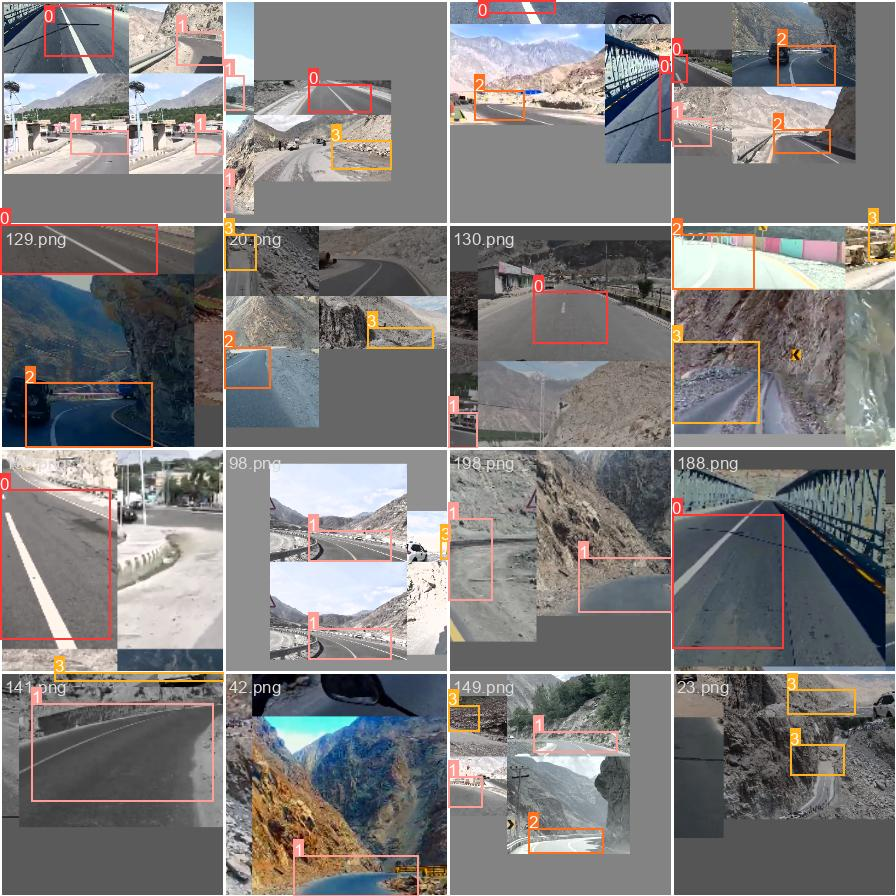

In [15]:
Image(filename='runs/detect/train/train_batch1.jpg', width=600)

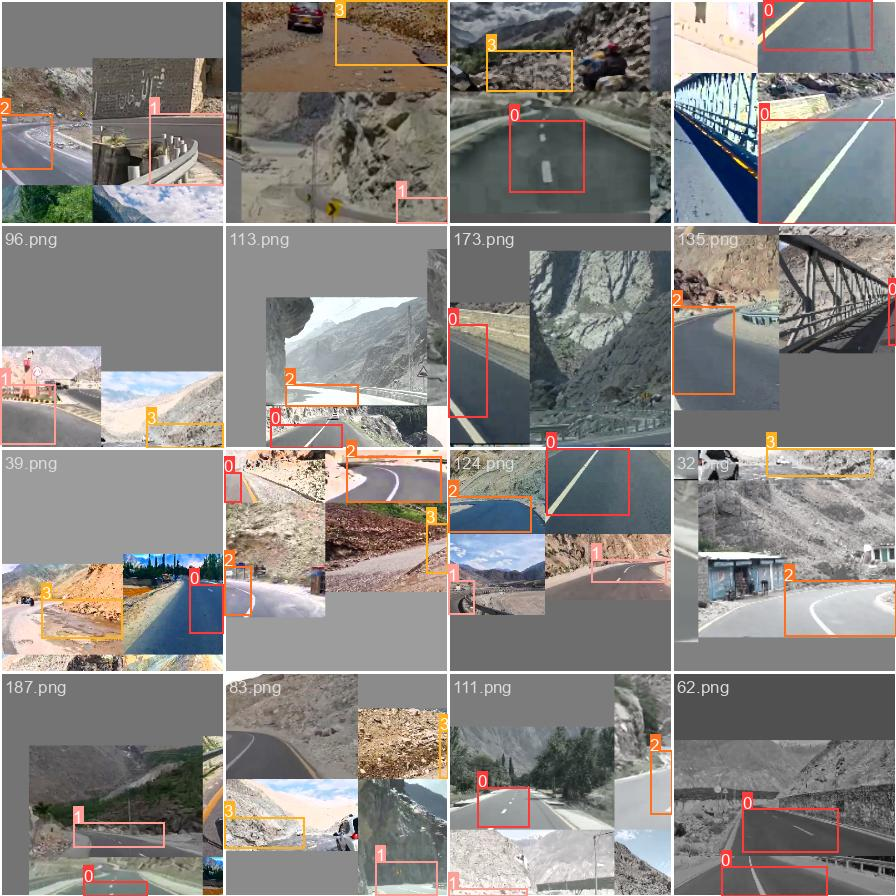

In [18]:
Image(filename='runs/detect/train/train_batch0.jpg', width=600)

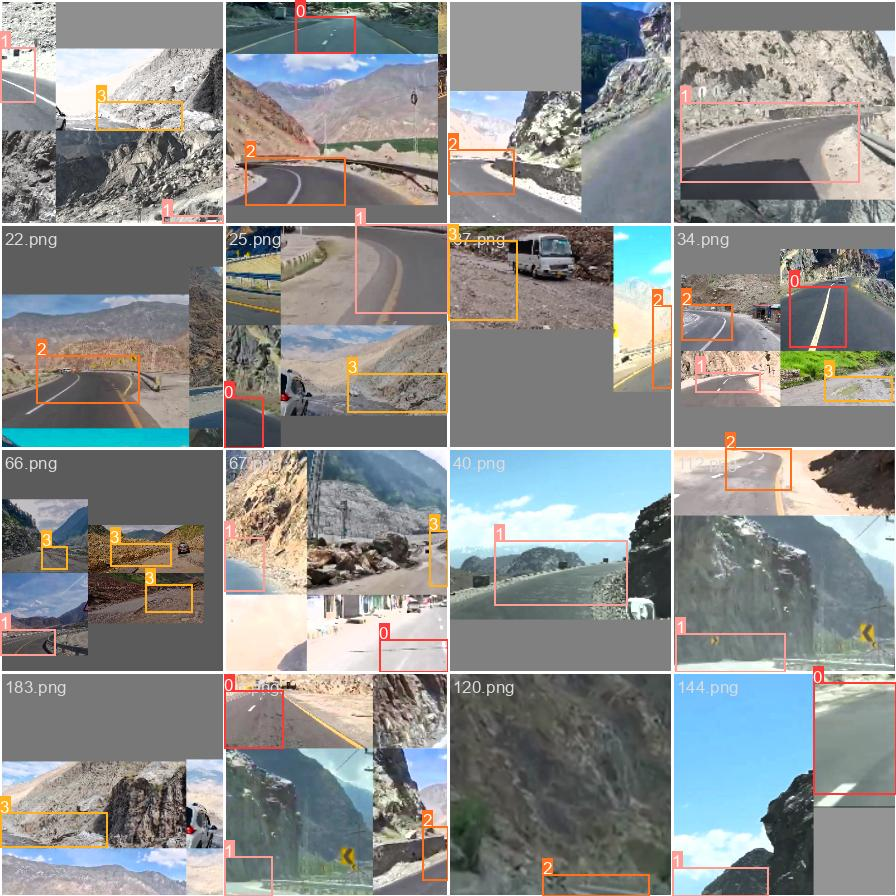

In [20]:
Image(filename='runs/detect/train/train_batch2.jpg', width=600)

# ***Validate Custom Model***


In [21]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-10-01 08:19:54.859129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 08:19:56.796703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/object/objectDetection/data/valid/labels.cache... 37 images, 1 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.98s/it]
                   all         38         37      0.493      0.477       0.51      0.251
               stright         38         10      0.677

# ***Inference with Custom Model***

In [22]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2023-10-01 08:20:34.843021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 08:20:36.817528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/38 /content/drive/MyDrive/object/objectDetection/data/test/images/1.png: 128x224 1 left, 89.1ms
image 2/38 /content/drive/MyDrive/object/objectDetection/data/test/images/10.png: 160x224 1 left, 138.8ms
image 3/38 /content/drive/MyDrive/object/objectDetection/data/test/images/101.png: 224x192 1 right, 156.9ms
image 4/38 /content/drive/MyDrive/object/objectDetection/data/test/images/102.png: 224x224 2 strights,

In [1]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")